In [12]:
# !matplotlib notebook
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import histogram
import tifffile
import os
import sys
from skimage import data, feature, exposure
import numpy as np

def scale_to(x,  dtype):
    r = np.max(x) - np.min(x)
    try:
        t_max = np.iinfo(np.dtype(dtype)).max
    except:
        t_max = np.finfo(np.dtype(dtype)).max
    
    # assert(math.isclose(0,r, abs_tol=np.finfo(float).eps) == False)
    x_s =  ((x - np.min(x)) / r) * t_max
    return x_s.astype(dtype)

def subtract(a, b, dtype='uint16'):
    try:
        t_min = np.iinfo(np.dtype(dtype)).min
        t_max = np.iinfo(np.dtype(dtype)).max
    except:
        t_min = np.finfo(np.dtype(dtype)).min
        t_max = np.finfo(np.dtype(dtype)).max        
    return np.clip(a.astype('int32') - b, t_min, t_max).astype(a.dtype)

def top_hat(image, radius=50, light_bg=False):
        from skimage.morphology import white_tophat, black_tophat, disk
        str_el = disk(radius) #you can also use 'ball' here to get a slightly smoother result at the cost of increased computing time
        if light_bg:
            return  scale_to(black_tophat(image, str_el), image.dtype)
        else:
            return  scale_to(white_tophat(image, str_el), image.dtype)

def thresholdV2(image, param=10):
    from skimage.filters import threshold_otsu
    dtype = image.dtype
    thresh = threshold_otsu(image)
    
    return image > thresh

def threshold(image, param=10):
    from skimage.filters import threshold_otsu
    dtype = image.dtype
    thresh = threshold_otsu(image)
    
    return thresh, subtract(image, thresh, image.dtype)

def dspeckle(image, param=10):
    from skimage.filters import median
    dtype = image.dtype
    return median(image)
    

def gaussian_filter(image, param=10):
    from skimage.filters import gaussian
    return scale_to(gaussian(image), image.dtype)


def plot_multi(images):
    fig, ax = plt.subplots(ncols=len(images), figsize=(20, 8))
    for i, image in enumerate(images.items()):
        ax[i].set_title(str(image[0]))
        ax[i].imshow(image[1], clim=[np.min(image[1]), np.max(image[1])], cmap='gray')
    plt.show()

def save_images(images, pre_fix="img"):
    os.makedirs(os.path.join(path,pre_fix), exist_ok=True)
    for key, img in images.items():
        p = os.path.join(path,pre_fix, f"{key}_image.tif")
        print()
        tifffile.imwrite(p, img)


In [14]:

path = "D:\\Data\\Sudipta\\Arpan"
file_name = "send-1.tif"


uint16
dskl dtype uint16
33
8253


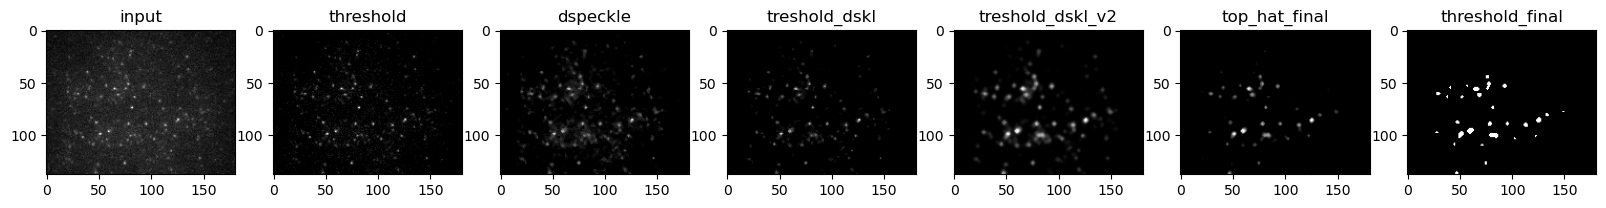

In [15]:

images = {}

img = tifffile.imread(os.path.join(path, file_name))[0]
dtype = img.dtype
images['input'] = img
print(dtype)

thr, threshold_img = threshold(img) #1
images['threshold'] = threshold_img

dskl = dspeckle(threshold_img) #2
images['dspeckle'] = dskl
print("dskl dtype", dskl.dtype)

thr, threshold_dskl = threshold(dskl) #3
images['treshold_dskl'] = threshold_dskl
print(thr)

gus = gaussian_filter(threshold_dskl) #4

dspklv2 = dspeckle(gus) #5
images['treshold_dskl_v2'] = dspklv2
thr, threshold_dskl_thv2 = threshold(dspklv2) #6
print(thr)

top_hat_final = top_hat(threshold_dskl_thv2) #7
images['top_hat_final'] = top_hat_final

threshold_final = thresholdV2(top_hat_final) #8
images['threshold_final'] = threshold_final
# top_hat_img = top_hat(dskl)
# images['top_hat'] = top_hat_img

# img = images['input'] - img
# images['bg_sub'] = img

plot_multi(images)
save_images(images, "exp10")


In [ ]:
images = tifffile.imread(os.path.join(path, file_name))
def get_particles_mask(img):
    thr, threshold_img = threshold(img)

    dskl = dspeckle(threshold_img)

    thr, threshold_dskl = threshold(dskl)

    gus = gaussian_filter(threshold_dskl)

    dspklv2 = dspeckle(gus)
    thr, threshold_dskl_thv2 = threshold(dspklv2)

    top_hat_final = top_hat(threshold_dskl_thv2)

    threshold_final = thresholdV2(top_hat_final)
#     feature.blob_log
    
img = get_particles_mask(images[i])


6447
6793


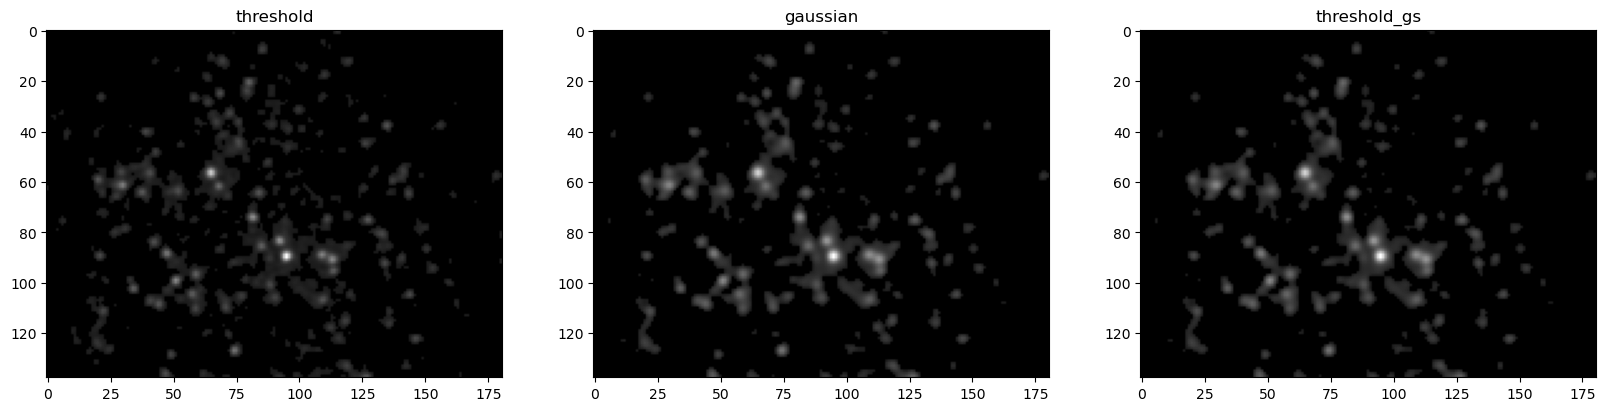

In [56]:
# next part work with top_hat images
images = {}
img = top_hat_img
thr, threshold_img = threshold(img)
images['threshold'] = threshold_img

print(thr)
# plt.imshow(threshold_img)

thr_gaussian = gaussian_filter(threshold_img)
images['gaussian'] = thr_gaussian



thr, threshold_img = threshold(thr_gaussian)
images['threshold_gs'] = threshold_img
print(thr)


plot_multi(images)
#save_images(images, "exp1_p2")



In [23]:
r = 0
print(f"r is {r}")

r is 0


In [16]:

img = tifffile.imread(os.path.join(path, "send-1.tif"))
print(img.shape)
def get_particles(images):
#     result = []
    for i in range(images.shape[0]):
        img = images[i]
        thr, threshold_img = threshold(img)

        dskl = dspeckle(threshold_img)

        thr, threshold_dskl = threshold(dskl)

        gus = gaussian_filter(threshold_dskl)

        dspklv2 = dspeckle(gus)
        thr, threshold_dskl_thv2 = threshold(dspklv2)

        top_hat_final = top_hat(threshold_dskl_thv2)

        threshold_final = thresholdV2(top_hat_final)
        yield threshold_final
#         yield result.append(threshold_final)
#     return np.stack(result, axis=0)
import time
start_time = time.time()
result = []
for i, im in enumerate(get_particles(img)):
    result.append(im)
    print(f"Done {i}")
    
mask = np.stack(result, axis=0)
tifffile.imwrite(os.path.join(path, "mask_send-1.tif"), mask)
print("--- %s seconds ---" % (time.time() - start_time))

(1248, 138, 181)
Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55
Done 56
Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73
Done 74
Done 75
Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104
Done 105
Done 106
Done 107
Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done

Done 921
Done 922
Done 923
Done 924
Done 925
Done 926
Done 927
Done 928
Done 929
Done 930
Done 931
Done 932
Done 933
Done 934
Done 935
Done 936
Done 937
Done 938
Done 939
Done 940
Done 941
Done 942
Done 943
Done 944
Done 945
Done 946
Done 947
Done 948
Done 949
Done 950
Done 951
Done 952
Done 953
Done 954
Done 955
Done 956
Done 957
Done 958
Done 959
Done 960
Done 961
Done 962
Done 963
Done 964
Done 965
Done 966
Done 967
Done 968
Done 969
Done 970
Done 971
Done 972
Done 973
Done 974
Done 975
Done 976
Done 977
Done 978
Done 979
Done 980
Done 981
Done 982
Done 983
Done 984
Done 985
Done 986
Done 987
Done 988
Done 989
Done 990
Done 991
Done 992
Done 993
Done 994
Done 995
Done 996
Done 997
Done 998
Done 999
Done 1000
Done 1001
Done 1002
Done 1003
Done 1004
Done 1005
Done 1006
Done 1007
Done 1008
Done 1009
Done 1010
Done 1011
Done 1012
Done 1013
Done 1014
Done 1015
Done 1016
Done 1017
Done 1018
Done 1019
Done 1020
Done 1021
Done 1022
Done 1023
Done 1024
Done 1025
Done 1026
Done 1027
Done 1028